In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.time import Time
#import astropysics.phot as phot
import math
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
import sys, time
import numpy as np
import scipy.signal as signal

import scipy
from scipy.stats import linregress
from IPython.display import clear_output

from scipy import stats
#np.seterr(divide='ignore', invalid='ignore')

In [2]:
def read_file_columns(filename, columns, types=None):
    res = []
    with open(filename, "r") as lines:
        for line in lines:
            if "#" in line:
                continue
            line = line.split()
            l = []
            for i in range(0, len(columns)):
                c = columns[i]
                if types is None:
                    l.append(line[c])
                else:
                    l.append(types[i](line[c]))
            res.append(np.array(l))
    return np.array(res)

In [3]:
#Subhalo        Group   IsCentral       Mass    Gas     DarkMatter      Stellar Blackhole       BHAccr.Rate     S-F.Rate        Rcirc   Vcirc   Vdisp   X       Y       Z       SDSS.i  SDDD.r  SDDD.g  SDDD.u  SDDD.z
#      0            1           2          3      4              5            6         7                 8            9           10      11    
prop_z0 = read_file_columns("./properties/z0_085.dat", [0, 7, 6, 5], types=[int, float, float, float])
prop_z1 = read_file_columns("./properties/z1_073.dat", [0, 7, 6, 5], types=[int, float, float, float])

In [11]:
f_ids_z0 = np.loadtxt("z0/filaments_ids_t")
g_ids_z0 = np.loadtxt("z0/groups_ids_t")
v_ids_z0 = np.loadtxt("z0/voids_ids_t")

f_ids_z1 = np.loadtxt("z1/filaments_ids_t")
g_ids_z1 = np.loadtxt("z1/groups_ids_t")
v_ids_z1 = np.loadtxt("z1/voids_ids_t")

In [12]:
prop_z0[0]

array([0.0000e+00, 1.4544e+09, 8.5043e+12, 5.1131e+14])

In [13]:
# black_hole_mass, stellar_mass, DM_mass
#       0             1                2

z0_v = prop_z0[:,[1,2,3]][np.in1d(prop_z0[:,0], f_ids_z0)]
z0_g = prop_z0[:,[1,2,3]][np.in1d(prop_z0[:,0], g_ids_z0)]
z0_f = prop_z0[:,[1,2,3]][np.in1d(prop_z0[:,0], v_ids_z0)]

z1_v = prop_z1[:,[1,2,3]][np.in1d(prop_z1[:,0], f_ids_z1)]
z1_g = prop_z1[:,[1,2,3]][np.in1d(prop_z1[:,0], g_ids_z1)]
z1_f = prop_z1[:,[1,2,3]][np.in1d(prop_z1[:,0], v_ids_z1)]

z0_v = z0_v[z0_v[:,0] > 0]
z0_v = z0_v[z0_v[:,1] > 0]
z0_v = z0_v[z0_v[:,2] > 0]

z0_g = z0_g[z0_g[:,0] > 0]
z0_g = z0_g[z0_g[:,1] > 0]
z0_g = z0_g[z0_g[:,2] > 0]

z0_f = z0_f[z0_f[:,0] > 0]
z0_f = z0_f[z0_f[:,1] > 0]
z0_f = z0_f[z0_f[:,2] > 0]

z1_v = z1_v[z1_v[:,0] > 0]
z1_v = z1_v[z1_v[:,1] > 0]
z1_v = z1_v[z1_v[:,2] > 0]

z1_g = z1_g[z1_g[:,0] > 0]
z1_g = z1_g[z1_g[:,1] > 0]
z1_g = z1_g[z1_g[:,2] > 0]

z1_f = z1_f[z1_f[:,0] > 0]
z1_f = z1_f[z1_f[:,1] > 0]
z1_f = z1_f[z1_f[:,2] > 0]

z0_v = np.log10(z0_v)
z0_g = np.log10(z0_g)
z0_f = np.log10(z0_f)

z1_v = np.log10(z1_v)
z1_g = np.log10(z1_g)
z1_f = np.log10(z1_f)

#z0_v[:,0:] = np.log10(z0_v[:,0:])
#z0_g[:,0:] = np.log10(z0_g[:,0:])
#z0_f[:,0:] = np.log10(z0_f[:,0:])


#z1_v[:,0:] = np.log10(z1_v[:,0:])
#z1_g[:,0:] = np.log10(z1_g[:,0:])
#z1_f[:,0:] = np.log10(z1_f[:,0:])

z0_g = z0_g[z0_g[:,0] < 20]

In [17]:
#black_hole_mass,stellar_mass,DM_mass
#              0            1       2

np.max(z0_v[:,0]), np.max(z0_g[:,0]), np.max(z0_f[:,0])

(9.422770348036467, 10.350635608258955, 8.378942698613438)

In [15]:
def min_max(data):
    m = np.min(data)
    M = np.max(data)
    return np.array([m, M])

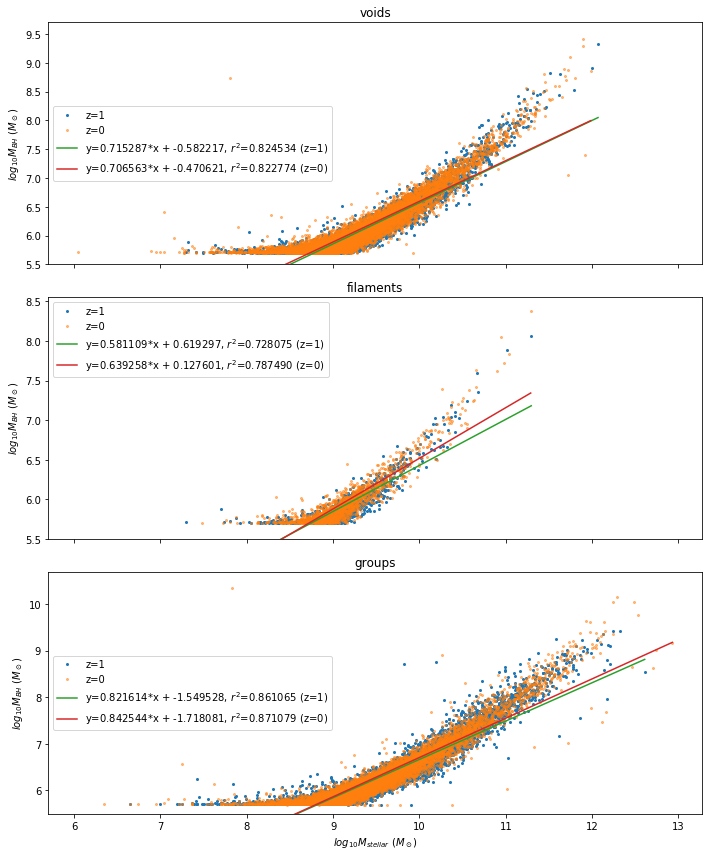

In [32]:
fig, ax = plt.subplots(3, sharex=True, figsize=(10, 12))

ax[0].ticklabel_format(useOffset=True, style='plain')
ax[1].ticklabel_format(useOffset=True, style='plain')

f_v_z0 = stats.linregress(z0_v[:,1], z0_v[:,0])
f_v_z1 = stats.linregress(z1_v[:,1], z1_v[:,0])

f_g_z0 = stats.linregress(z0_g[:,1], z0_g[:,0])
f_g_z1 = stats.linregress(z1_g[:,1], z1_g[:,0])

f_f_z0 = stats.linregress(z0_f[:,1], z0_f[:,0])
f_f_z1 = stats.linregress(z1_f[:,1], z1_f[:,0])

ax[0].set_title('voids');
ax[0].set_ylabel('$log_{10}M_{BH}$ ($M_\odot$)');
ax[0].plot(z1_v[:,1], z1_v[:,0], '.', label="z=1", markersize=4)
ax[0].plot(z0_v[:,1], z0_v[:,0], '.', label="z=0", alpha=0.5, markersize=4)

ax[0].plot(min_max(z1_v[:,1]), min_max(z1_v[:,1]) * f_v_z1[0] + f_v_z1[1], '-', label="y=%f*x + %f, $r^2$=%f (z=1)" % (f_v_z1[0], f_v_z1[1], f_v_z1[2]**2))
ax[0].plot(min_max(z0_v[:,1]), min_max(z0_v[:,1]) * f_v_z0[0] + f_v_z0[1], '-', label="y=%f*x + %f, $r^2$=%f (z=0)" % (f_v_z0[0], f_v_z0[1], f_v_z0[2]**2))

#ax[0].plot(z0_v[:,1], f_v[0] * z0_v[:,1] + f_v[1], color='red')
ax[0].set_ylim([5.5, None])
#ax[0].set_yscale('log');
ax[0].legend()

ax[1].set_title('filaments');
ax[1].set_ylabel('$log_{10}M_{BH}$ ($M_\odot$)');
ax[1].plot(z1_f[:,1], z1_f[:,0], '.', label="z=1", markersize=4)
ax[1].plot(z0_f[:,1], z0_f[:,0], '.', label="z=0", alpha=0.5, markersize=4)

ax[1].plot(min_max(z1_f[:,1]), min_max(z1_f[:,1]) * f_f_z1[0] + f_f_z1[1], '-', label="y=%f*x + %f, $r^2$=%f (z=1)" % (f_f_z1[0], f_f_z1[1], f_f_z1[2]**2))
ax[1].plot(min_max(z0_f[:,1]), min_max(z0_f[:,1]) * f_f_z0[0] + f_f_z0[1], '-', label="y=%f*x + %f, $r^2$=%f (z=0)" % (f_f_z0[0], f_f_z0[1], f_f_z0[2]**2))

#ax[1].plot(z0_v[:,1], f_v[0] * z0_v[:,1] + f_v[1], color='red')
ax[1].set_ylim([5.5, None])
#ax[1].set_yscale('log');
ax[1].legend()

ax[2].set_title('groups');
ax[2].set_ylabel('$log_{10}M_{BH}$ ($M_\odot$)');
ax[2].plot(z1_g[:,1], z1_g[:,0], '.', label="z=1", markersize=4);
ax[2].plot(z0_g[:,1], z0_g[:,0], '.', label="z=0", alpha=0.5, markersize=4);

ax[2].plot(min_max(z1_g[:,1]), min_max(z1_g[:,1]) * f_g_z1[0] + f_g_z1[1], '-', label="y=%f*x + %f, $r^2$=%f (z=1)" % (f_g_z1[0], f_g_z1[1], f_g_z1[2]**2))
ax[2].plot(min_max(z0_g[:,1]), min_max(z0_g[:,1]) * f_g_z0[0] + f_g_z0[1], '-', label="y=%f*x + %f, $r^2$=%f (z=0)" % (f_g_z0[0], f_g_z0[1], f_g_z0[2]**2))

ax[2].set_ylim([5.5, None])
#ax[2].set_yscale('log');
ax[2].set_xlabel('$log_{10}M_{stellar}$ ($M_\odot$)');
ax[2].legend()

#ax[2].set_ylim([0.0,0.0008])

plt.tight_layout();
plt.xlim([None, None])
#plt.xscale('log');
plt.show();

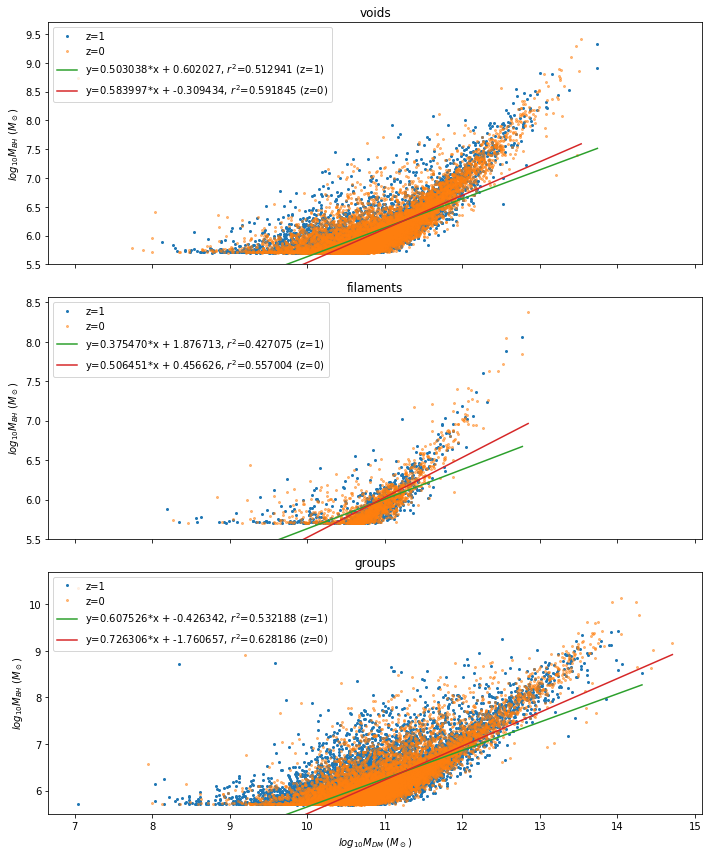

In [31]:
fig, ax = plt.subplots(3, sharex=True, figsize=(10, 12))

f_v_z0 = stats.linregress(z0_v[:,2], z0_v[:,0])
f_v_z1 = stats.linregress(z1_v[:,2], z1_v[:,0])

f_g_z0 = stats.linregress(z0_g[:,2], z0_g[:,0])
f_g_z1 = stats.linregress(z1_g[:,2], z1_g[:,0])

f_f_z0 = stats.linregress(z0_f[:,2], z0_f[:,0])
f_f_z1 = stats.linregress(z1_f[:,2], z1_f[:,0])

ax[0].set_title('voids');
ax[0].set_ylabel('$log_{10}M_{BH}$ ($M_\odot$)');
ax[0].plot(z1_v[:,2], z1_v[:,0], '.', label="z=1", markersize=4)
ax[0].plot(z0_v[:,2], z0_v[:,0], '.', label="z=0", alpha=0.5, markersize=4)

ax[0].plot(min_max(z1_v[:,2]), min_max(z1_v[:,2]) * f_v_z1[0] + f_v_z1[1], '-', label="y=%f*x + %f, $r^2$=%f (z=1)" % (f_v_z1[0], f_v_z1[1], f_v_z1[2]**2))
ax[0].plot(min_max(z0_v[:,2]), min_max(z0_v[:,2]) * f_v_z0[0] + f_v_z0[1], '-', label="y=%f*x + %f, $r^2$=%f (z=0)" % (f_v_z0[0], f_v_z0[1], f_v_z0[2]**2))

#ax[0].plot(z0_v[:,2], f_v[0] * z0_v[:,2] + f_v[1], color='red')
ax[0].set_ylim([5.5, None])
#ax[0].set_yscale('log');
ax[0].legend()


ax[1].set_title('filaments');
ax[1].set_ylabel('$log_{10}M_{BH}$ ($M_\odot$)');
ax[1].plot(z1_f[:,2], z1_f[:,0], '.', label="z=1", markersize=4)
ax[1].plot(z0_f[:,2], z0_f[:,0], '.', label="z=0", alpha=0.5, markersize=4)

ax[1].plot(min_max(z1_f[:,2]), min_max(z1_f[:,2]) * f_f_z1[0] + f_f_z1[1], '-', label="y=%f*x + %f, $r^2$=%f (z=1)" % (f_f_z1[0], f_f_z1[1], f_f_z1[2]**2))
ax[1].plot(min_max(z0_f[:,2]), min_max(z0_f[:,2]) * f_f_z0[0] + f_f_z0[1], '-', label="y=%f*x + %f, $r^2$=%f (z=0)" % (f_f_z0[0], f_f_z0[1], f_f_z0[2]**2))

#ax[1].plot(z0_v[:,2], f_v[0] * z0_v[:,2] + f_v[1], color='red')
ax[1].set_ylim([5.5, None])
#ax[1].set_yscale('log');
ax[1].legend()

ax[2].set_title('groups');
ax[2].set_ylabel('$log_{10}M_{BH}$ ($M_\odot$)');
ax[2].plot(z1_g[:,2], z1_g[:,0], '.', label="z=1", markersize=4);
ax[2].plot(z0_g[:,2], z0_g[:,0], '.', label="z=0", alpha=0.5, markersize=4);

ax[2].plot(min_max(z1_g[:,2]), min_max(z1_g[:,2]) * f_g_z1[0] + f_g_z1[1], '-', label="y=%f*x + %f, $r^2$=%f (z=1)" % (f_g_z1[0], f_g_z1[1], f_g_z1[2]**2))
ax[2].plot(min_max(z0_g[:,2]), min_max(z0_g[:,2]) * f_g_z0[0] + f_g_z0[1], '-', label="y=%f*x + %f, $r^2$=%f (z=0)" % (f_g_z0[0], f_g_z0[1], f_g_z0[2]**2))


ax[2].set_ylim([5.5, None])
#ax[2].set_yscale('log');
ax[2].set_xlabel('$log_{10}M_{DM}$ ($M_\odot$)');
ax[2].legend()

plt.tight_layout();
plt.xlim([None, None])
#plt.xscale('log');
plt.show();